# 1.5. Stochastic Gradient Descent
http://scikit-learn.org/stable/modules/sgd.html

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

The advantages of Stochastic Gradient Descent are:

- Efficiency.
- Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.

## 1.5.1. Classification
#### Warning
Make sure you permute (shuffle) your training data before fitting the model or use shuffle=True to shuffle after each iteration.

The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification.

### SGD: Maximum margin separating hyperplane
Plot the maximum margin separating hyperplane within a two-class separable dataset using a linear Support Vector Machines classifier trained using SGD.

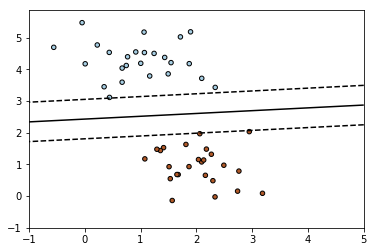

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1):
#     x1 = val
    x1 = X1[i, j]
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]]) 
    Z[i, j] = p[0]
    
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor='black', s=20)

plt.axis('tight')
plt.show()

As other classifiers, SGD has to be fitted with two arrays:  
- an array X of size [n_samples, n_features] holding the training samples, and 
- an array Y of size [n_samples] holding the target values (class labels) for the training samples:

In [18]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)
clf

C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

After being fitted, the model can then be used to predict new values:

In [19]:
clf.predict([[2., 2.]])

array([1])

SGD fits a linear model to the training data. The member coef_ holds the model parameters:

In [20]:
clf.coef_

array([[ 9.91080278,  9.91080278]])

Member intercept_ holds the intercept (aka offset or bias):

In [21]:
clf.intercept_

array([-9.99002993])

Whether or not the model should use an intercept, i.e. a biased hyperplane, is controlled by the parameter fit_intercept.

To get the signed distance to the hyperplane use SGDClassifier.decision_function:

In [22]:
clf.decision_function([[2., 2.]]) 

array([ 29.65318117])

The concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:

- loss="hinge": (soft-margin) linear Support Vector Machine,
- loss="modified_huber": smoothed hinge loss,
- loss="log": logistic regression,
- and all regression losses below.

The first two loss functions are lazy, they only update the model parameters if an example violates the margin constraint, which makes training very efficient and may result in sparser models, even when L2 penalty is used.

Using loss="log" or loss="modified_huber" enables the predict_proba method, which gives a vector of probability estimates P(y|x) per sample x:

In [23]:
clf = SGDClassifier(loss="log").fit(X, y)
clf.predict_proba([[1., 1.]])   

C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([[ 0.00459185,  0.99540815]])

The concrete penalty can be set via the penalty parameter. SGD supports the following penalties:

- penalty="l2": L2 norm penalty on coef_.
- penalty="l1": L1 norm penalty on coef_.
- penalty="elasticnet": Convex combination of L2 and L1; (1 - l1_ratio) * L2 + l1_ratio * L1.  

The default setting is `penalty="l2"`. The L1 penalty leads to sparse solutions, driving most coefficients to zero. The Elastic Net solves some deficiencies of the L1 penalty in the presence of highly correlated attributes. The parameter `l1_ratio` controls the convex combination of L1 and L2 penalty.

SGDClassifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the K classes, a binary classifier is learned that discriminates between that and all other K-1 classes. At testing time, we compute the confidence score (i.e. the signed distances to the hyperplane) for each classifier and choose the class with the highest confidence. The Figure below illustrates the OVA approach on the iris dataset. The dashed lines represent the three OVA classifiers; the background colors show the decision surface induced by the three classifiers.

### Plot multi-class SGD on the iris dataset
Plot decision surface of multi-class SGD on iris dataset. The hyperplanes corresponding to the three one-versus-all (OVA) classifiers are represented by the dashed lines.

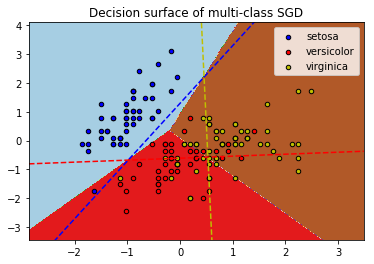

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

In the case of multi-class classification coef_ is a two-dimensionally array of shape=[n_classes, n_features] and intercept_ is a one dimensional array of shape=[n_classes]. The i-th row of coef_ holds the weight vector of the OVA classifier for the i-th class; classes are indexed in ascending order (see attribute classes_). Note that, in principle, since they allow to create a probability model, loss="log" and loss="modified_huber" are more suitable for one-vs-all classification.

SGDClassifier supports both weighted classes and weighted instances via the fit parameters class_weight and sample_weight. See the examples below and the doc string of SGDClassifier.fit for further information.

### SGD: Weighted samples
Plot decision function of a weighted dataset, where the size of points is proportional to its weight.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight = 100 * np.abs(np.random.randn(20))
# and assign a bigger weight to the last 10 samples
sample_weight[:10] *= 10
sample_weight

array([ 1048.55296507,  1420.01793718,  1706.27019063,  1950.77539523,
         509.65218175,   438.07430161,  1252.79536005,   777.49035583,
        1613.89784756,   212.74028021,    89.54665612,    38.69024979,
          51.08051376,   118.06321841,     2.81822283,    42.83318705,
           6.65172224,    30.24718977,    63.43220937,    36.2741166 ])

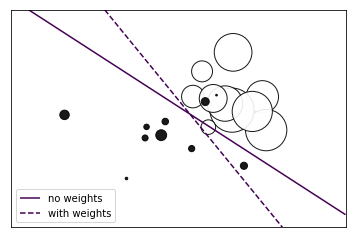

In [27]:
# plot the weighted data points
xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, 
            s=sample_weight, 
            alpha=0.9, cmap=plt.cm.bone, edgecolor='black')

# fit the unweighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
no_weights = plt.contour(xx, yy, Z, levels=[0], 
                         linestyles=['solid'])

# fit the weighted model
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=100)
clf.fit(X, y, 
        sample_weight=sample_weight)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
samples_weights = plt.contour(xx, yy, Z, levels=[0],
                              linestyles=['dashed'])  # dashed line

plt.legend([no_weights.collections[0], samples_weights.collections[0]],
           ["no weights", "with weights"], loc="lower left")

plt.xticks(())
plt.yticks(())
plt.show()

### Comparing various online solvers
An example showing how different online solvers perform on the hand-written digits dataset.

training SGD


C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


training ASGD
training Perceptron


C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


training Passive-Aggressive I


C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


training Passive-Aggressive II
training SAG


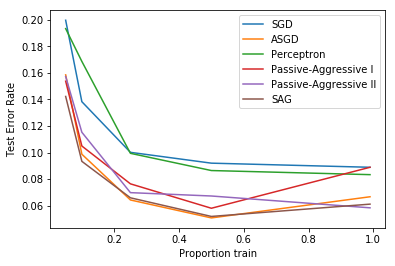

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
digits = datasets.load_digits()
X, y = digits.data, digits.target

classifiers = [
    ("SGD", SGDClassifier()),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge', C=1.0)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge', C=1.0)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

### SVM: Separating hyperplane for unbalanced classes
Find the optimal separating hyperplane using an SVC for classes that are unbalanced.

We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.

#### Note
This example will also work by replacing SVC(kernel="linear") with SGDClassifier(loss="hinge"). Setting the loss parameter of the SGDClassifier equal to hinge will yield behaviour such as that of a SVC with a linear kernel.
For example try instead of the SVC:

`clf = SGDClassifier(n_iter=100, alpha=0.01)`

No handles with labels found to put in legend.


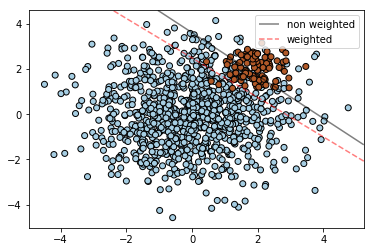

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create clusters with 1000 and 100 points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear',
               class_weight={1: 10,})  # class_weight
wclf.fit(X, y)

# plot separating hyperplanes and samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['--'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

SGDClassifier supports averaged SGD (ASGD). Averaging can be enabled by setting `average=True`. ASGD works by averaging the coefficients of the plain SGD over each iteration over a sample. When using ASGD the learning rate can be larger and even constant leading on some datasets to a speed up in training time.

For classification with a logistic loss, another variant of SGD with an averaging strategy is available with Stochastic Average Gradient (SAG) algorithm, available as a solver in LogisticRegression.

## 1.5.2. Regression
The class SGDRegressor implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. SGDRegressor is well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend Ridge, Lasso, or ElasticNet.

The concrete loss function can be set via the loss parameter. SGDRegressor supports the following loss functions:

- loss="squared_loss": Ordinary least squares,
- loss="huber": Huber loss for robust regression,
- loss="epsilon_insensitive": linear Support Vector Regression.
The Huber and epsilon-insensitive loss functions can be used for robust regression. The width of the insensitive region has to be specified via the parameter epsilon. This parameter depends on the scale of the target variables.

SGDRegressor supports averaged SGD as SGDClassifier. Averaging can be enabled by setting `average=True`.

For regression with a squared loss and a l2 penalty, another variant of SGD with an averaging strategy is available with Stochastic Average Gradient (SAG) algorithm, available as a solver in Ridge.

## 1.5.3. Stochastic Gradient Descent for sparse data
**Note** The sparse implementation produces slightly different results than the dense implementation due to a shrunk learning rate for the intercept.  

There is built-in support for sparse data given in any matrix in a format supported by scipy.sparse. For maximum efficiency, however, use the CSR matrix format as defined in scipy.sparse.csr_matrix.

### Classification of text documents using sparse features
This is an example showing how scikit-learn can be used to classify documents by topics using a bag-of-words approach. This example uses a scipy.sparse matrix to store the features and demonstrates various classifiers that can efficiently handle sparse matrices.

The dataset used in this example is the 20 newsgroups dataset. It will be automatically downloaded, then cached.

The bar plot indicates the accuracy, training time (normalized) and test time (normalized) of each classifier.

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loa

C:\Softwares\Python\lib\site-packages\sklearn\linear_model\ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.235s
test time:  0.005s
accuracy:   0.897
dimensionality: 33809
density: 1.000000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=50, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)
train time: 0.101s
test time:  0.002s
accuracy:   0.885
dimensionality: 33809
density: 0.240165


Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=50,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.147s
test time:  0.002s
accuracy:   0.899
dimensionality: 33809
density: 0.702106


kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
train time: 0.002s
test time:  0.148s
accuracy:   0.858

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train time: 2.605s
test time:  0.083s
accuracy:   0.829


C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.203s
test time:  0.001s
accuracy:   0.873
dimensionality: 33809
density: 0.005568


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.347s
test time:  0.002s
accuracy:   0.886
dimensionality: 33809
density: 0.020017


Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


C:\Softwares\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.533s
test time:  0.002s
accuracy:   0.899
dimensionality: 33809
density: 0.186578


NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.006s
test time:  0.003s
accuracy:   0.855

Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.006s
test time:  0.002s
accuracy:   0.899
dimensionality: 33809
density: 1.000000


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.008s
test time:  0.007s
accuracy:   0.884
dimensionality: 33809
density: 1.000000


LinearSVC with L1-based feature selection
________________________________________________________________________________
Traini

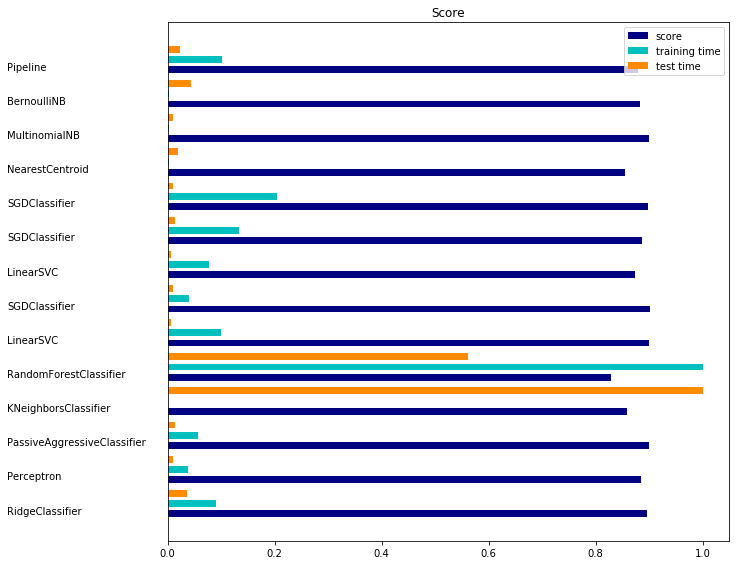

In [34]:
import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# parse commandline arguments
op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option("--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')

# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()


# #############################################################################
# Load some categories from the training set
if opts.all_categories:
    categories = None
else:
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]

if opts.filtered:
    remove = ('headers', 'footers', 'quotes')
else:
    remove = ()

print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=remove)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=remove)
print('data loaded')

# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names


def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

data_train_size_mb = size_mb(data_train.data)
data_test_size_mb = size_mb(data_test.data)

print("%d documents - %0.3fMB (training set)" % (
    len(data_train.data), data_train_size_mb))
print("%d documents - %0.3fMB (test set)" % (
    len(data_test.data), data_test_size_mb))
print("%d categories" % len(categories))
print()

# split a training set and a test set
y_train, y_test = data_train.target, data_test.target

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False,
                                   n_features=opts.n_features)
    X_train = vectorizer.transform(data_train.data)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" %
          opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names:
        # keep selected feature names
        feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
    print("done in %fs" % (time() - t0))
    print()

if feature_names:
    feature_names = np.asarray(feature_names)


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."


# #############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []

# ***********************************************************************
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (Perceptron(n_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(n_iter=50), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty=penalty)))

# ***********************************************************************

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")

# ***********************************************************************
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

# make some plots

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

## 1.5.4. Complexity
The major advantage of SGD is its efficiency, which is basically linear in the number of training examples. If X is a matrix of size (n, p) training has a cost of O(k n \bar p), where k is the number of iterations (epochs) and \bar p is the average number of non-zero attributes per sample.

Recent theoretical results, however, show that the runtime to get some desired optimization accuracy does not increase as the training set size increases.

## 1.5.5. Tips on Practical Use
- Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. This can be easily done using StandardScaler:  

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data
```

- If your attributes have an intrinsic scale (e.g. word frequencies or indicator features) scaling is not needed.

- Finding a reasonable regularization term $\alpha$ is best done using GridSearchCV, usually in the range `10.0**-np.arange(1,7)`.

- Empirically, we found that SGD converges after observing approx. 10^6 training samples. Thus, a reasonable first guess for the number of iterations is `n_iter = np.ceil(10**6 / n)`, where n is the size of the training set.

- If you apply SGD to features extracted using PCA we found that it is often wise to scale the feature values by some constant c such that the average L2 norm of the training data equals one.

- We found that Averaged SGD works best with a larger number of features and a higher eta0

## 1.5.6. Mathematical formulation
Given a set of training examples $(x_1, y_1), \ldots, (x_n, y_n)$ where $x_i \in \mathbf{R}^m and y_i \in \{-1,1\}$, our goal is to learn a linear scoring function $f(x) = w^T x + b$ with model parameters $w \in \mathbf{R}^m$ and intercept $b \in \mathbf{R}$. In order to make predictions, we simply look at the sign of f(x). A common choice to find the model parameters is by minimizing the regularized training error given by

$E(w,b) = \frac{1}{n}\sum_{i=1}^{n} L(y_i, f(x_i)) + \alpha R(w)$

where L is a loss function that measures model (mis)fit and R is a regularization term (aka penalty) that penalizes model complexity; $\alpha > 0$ is a non-negative hyperparameter.

Different choices for L entail different classifiers such as

- Hinge: (soft-margin) Support Vector Machines.
- Log: Logistic Regression.
- Least-Squares: Ridge Regression.
- Epsilon-Insensitive: (soft-margin) Support Vector Regression.  

All of the above loss functions can be regarded as an upper bound on the misclassification error (Zero-one loss) as shown in the Figure below.

### SGD: convex loss functions
A plot that compares the various convex loss functions supported by sklearn.linear_model.SGDClassifier .

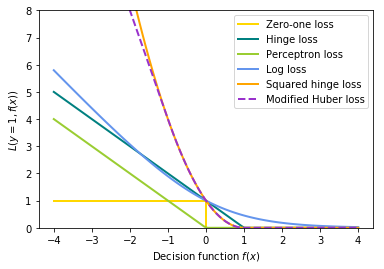

In [36]:
import numpy as np
import matplotlib.pyplot as plt


def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

Popular choices for the regularization term R include:

- L2 norm: R(w) := $\frac{1}{2} \sum_{i=1}^{n} w_i^2$,
- L1 norm: R(w) := $\sum_{i=1}^{n} |w_i|$, which leads to sparse solutions.
- Elastic Net: R(w) := $\frac{\rho}{2} \sum_{i=1}^{n} w_i^2 + (1-\rho) \sum_{i=1}^{n} |w_i|$, a convex combination of L2 and L1, 

where $\rho$ is given by `1 - l1_ratio`.
The Figure below shows the contours of the different regularization terms in the parameter space when R(w) = 1.

### SGD: Penalties
Plot the contours of the three penalties.

All of the above are supported by sklearn.linear_model.stochastic_gradient.

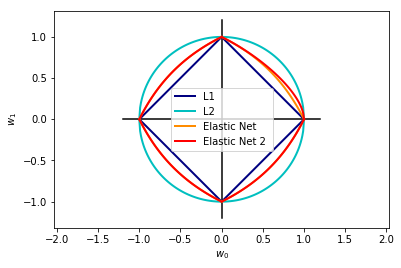

In [49]:
import numpy as np
import matplotlib.pyplot as plt


def l1(xs):
    return np.array([np.sqrt((1 - np.sqrt(x ** 2.0)) ** 2.0) for x in xs])


def l2(xs):
    return np.array([np.sqrt(1.0 - x ** 2.0) for x in xs])


def el(xs, z):
    return np.array([(2 - 2 * x - 2 * z + 4 * x * z -
                      (4 * z ** 2
                       - 8 * x * z ** 2
                       + 8 * x ** 2 * z ** 2
                       - 16 * x ** 2 * z ** 3
                       + 8 * x * z ** 3 + 4 * x ** 2 * z ** 4) ** (1. / 2)
                      - 2 * x * z ** 2) / (2 - 4 * z) for x in xs])

def el_2(xs, z):
    return l2(xs)*z + (1-z)*l1(xs)

def cross(ext):
    plt.plot([-ext, ext], [0, 0], "k-")
    plt.plot([0, 0], [-ext, ext], "k-")

xs = np.linspace(0, 1, 100)

alpha = 0.501  # 0.5 division throuh zero

cross(1.2)

l1_color = "navy"
l2_color = "c"
elastic_net_color = "darkorange"
elastic_net_color_2 = "red"
lw = 2

plt.plot(xs, l1(xs), color=l1_color, label="L1", lw=lw)
plt.plot(xs, -1.0 * l1(xs), color=l1_color, lw=lw)
plt.plot(-1 * xs, l1(xs), color=l1_color, lw=lw)
plt.plot(-1 * xs, -1.0 * l1(xs), color=l1_color, lw=lw)

plt.plot(xs, l2(xs), color=l2_color, label="L2", lw=lw)
plt.plot(xs, -1.0 * l2(xs), color=l2_color, lw=lw)
plt.plot(-1 * xs, l2(xs), color=l2_color, lw=lw)
plt.plot(-1 * xs, -1.0 * l2(xs), color=l2_color, lw=lw)

plt.plot(xs, el(xs, alpha), color=elastic_net_color, label="Elastic Net", lw=lw)
plt.plot(xs, -1.0 * el(xs, alpha), color=elastic_net_color, lw=lw)
plt.plot(-1 * xs, el(xs, alpha), color=elastic_net_color, lw=lw)
plt.plot(-1 * xs, -1.0 * el(xs, alpha), color=elastic_net_color, lw=lw)

plt.plot(xs, el_2(xs, alpha), color=elastic_net_color_2, label="Elastic Net 2 ", lw=lw)
plt.plot(xs, -1.0 * el(xs, alpha), color=elastic_net_color_2, lw=lw)
plt.plot(-1 * xs, el(xs, alpha), color=elastic_net_color_2, lw=lw)
plt.plot(-1 * xs, -1.0 * el(xs, alpha), color=elastic_net_color_2, lw=lw)

plt.xlabel(r"$w_0$")
plt.ylabel(r"$w_1$")
plt.legend()

plt.axis("equal")
plt.show()

### 1.5.6.1. SGD
Stochastic gradient descent is an optimization method for unconstrained optimization problems. In contrast to (batch) gradient descent, SGD approximates the true gradient of E(w,b) by considering a single training example at a time.

The class SGDClassifier implements a first-order SGD learning routine. The algorithm iterates over the training examples and for each example updates the model parameters according to the update rule given by

$w \leftarrow w - \eta (\alpha \frac{\partial R(w)}{\partial w} + \frac{\partial L(w^T x_i + b, y_i)}{\partial w})$

where $\eta$ is the learning rate which controls the step-size in the parameter space. The intercept b is updated similarly but without regularization.

The learning rate $\eta$ can be either constant or gradually decaying. For classification, the default learning rate schedule `(learning_rate='optimal')` is given by

$\eta^{(t)} = \frac {1}{\alpha  (t_0 + t)}$

where t is the time step (there are a total of n_samples * n_iter time steps), t_0 is determined based on a heuristic proposed by Léon Bottou such that the expected initial updates are comparable with the expected size of the weights (this assuming that the norm of the training samples is approx. 1). The exact definition can be found in `_init_t` in BaseSGD.

For regression the default learning rate schedule is inverse scaling (learning_rate='invscaling'), given by

$\eta^{(t)} = \frac{eta_0}{t^{power\_t}}$

where `eta_0` and $power\_t$ are hyperparameters chosen by the user via eta0 and `power_t`, resp.

For a constant learning rate use `learning_rate='constant'` and use eta0 to specify the learning rate.

The model parameters can be accessed through the members coef_ and intercept_:

- Member `coef_` holds the weights w
- Member `intercept_` holds b

## 1.5.7. Implementation details
The implementation of SGD is influenced by the Stochastic Gradient SVM of Léon Bottou. Similar to SvmSGD, the weight vector is represented as the product of a scalar and a vector which allows an efficient weight update in the case of L2 regularization. In the case of sparse feature vectors, the intercept is updated with a smaller learning rate (multiplied by 0.01) to account for the fact that it is updated more frequently. Training examples are picked up sequentially and the learning rate is lowered after each observed example. We adopted the learning rate schedule from Shalev-Shwartz et al. 2007. For multi-class classification, a “one versus all” approach is used. We use the truncated gradient algorithm proposed by Tsuruoka et al. 2009 for L1 regularization (and the Elastic Net). The code is written in Cython.